KeyboardInterrupt: 

In [ ]:
import scipy.signal as sig
import pandas as pd
import scipy.io as sio

electrodes = [8, 44, 80, 131, 185]
dtfs = []
pacientes = [l + str(i).zfill(2) + ".mat" for i in range(1,11) for l in "PS"]

# Si cargo todas las matrices en memoria me quedo sin ram
for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    for electrode in electrodes:
        if (dtfspatient is None):
            dtfspatient = pd.DataFrame(test[:,electrode,:])
        else:
            dtfspatient.add(pd.DataFrame(test[:,electrode,:]))
            
    dtfs.append(dtfspatient / len(electrodes))
          
means = dtfs[0]
for dtf in dtfs[1:]:
    means.add(dtf)
means /= len(pacientes)

In [ ]:
import matplotlib.pyplot as plt

transforms = []
X = []
Y = []
Z = []

i = 0
mx = 0
for epoch in means.iterrows():
    y, z = sig.welch(epoch[1].as_matrix(), fs = 250, nfft = 2048)
    X.append([i]*len(y))
    Y.append(y)
    Z.append(z)
    mx = max(mx,max(z))
    i += 1
    

plt.figure(figsize=(13,8))
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.ylim(0, 45)
plt.show()

### 

In [ ]:
import numpy as np

bandas = [0, 4, 8, 13, 30, 45]
bandaspaciente = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    bandaspaciente.append([])
    
    for i in range(len(bandas) -1):
        inicio = bandas[i] 
        fin = bandas[i+1]
        valores = [pot[i] for i in range(len(pot)) if freq[i] >= inicio and freq[i] < fin]
        bandaspaciente[-1].append(sum(valores))
        
pd.DataFrame(bandaspaciente, columns = ["delta", "theta", "alpha", "beta", "gamma"])
        
        

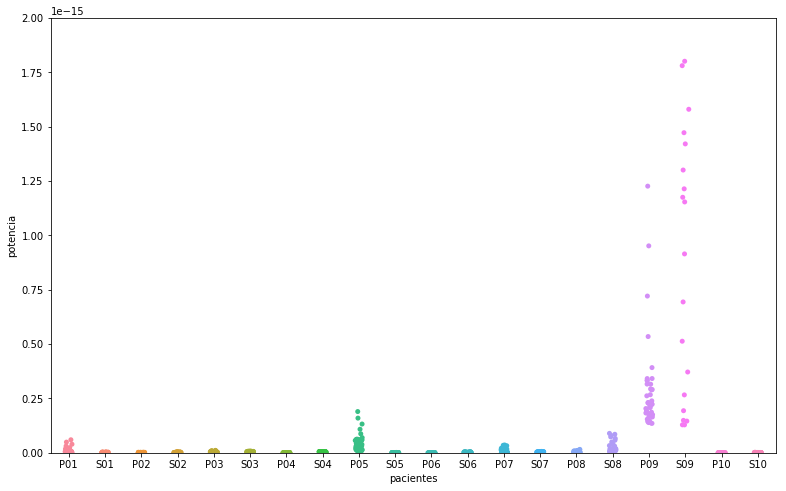

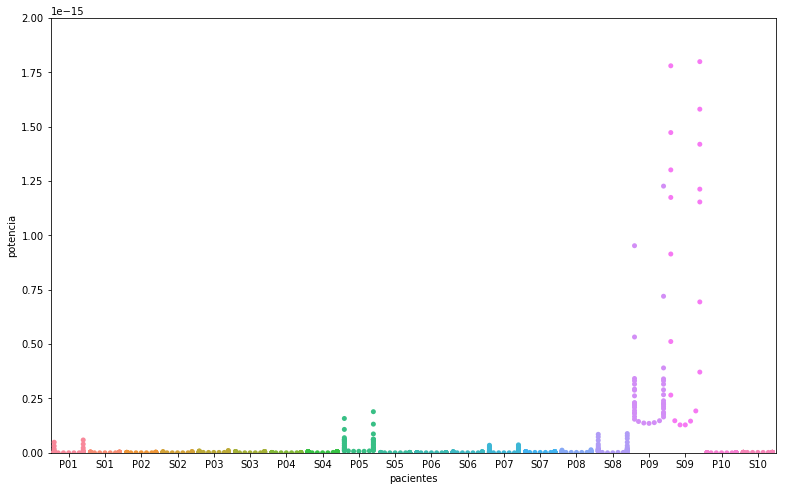

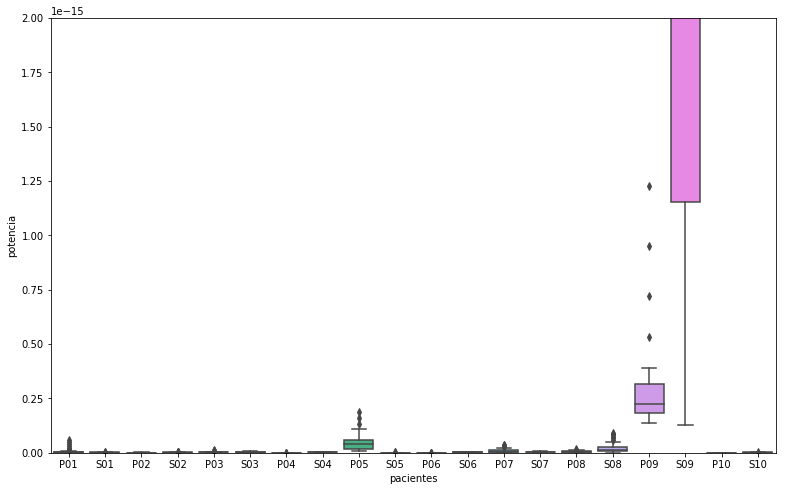

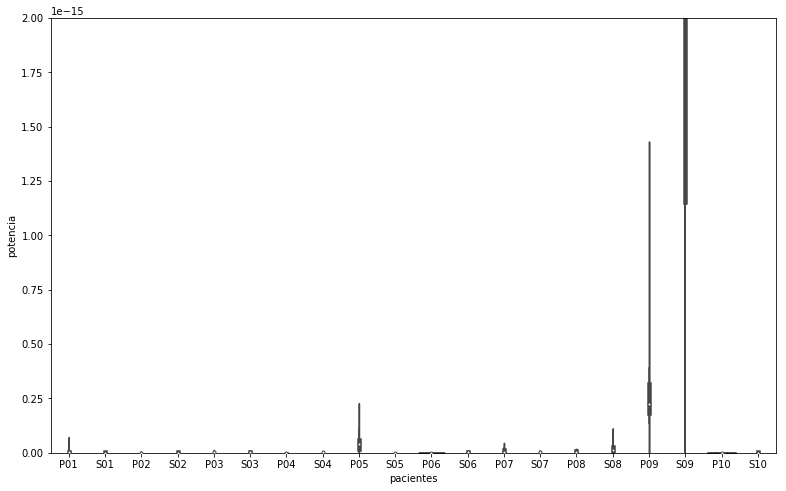

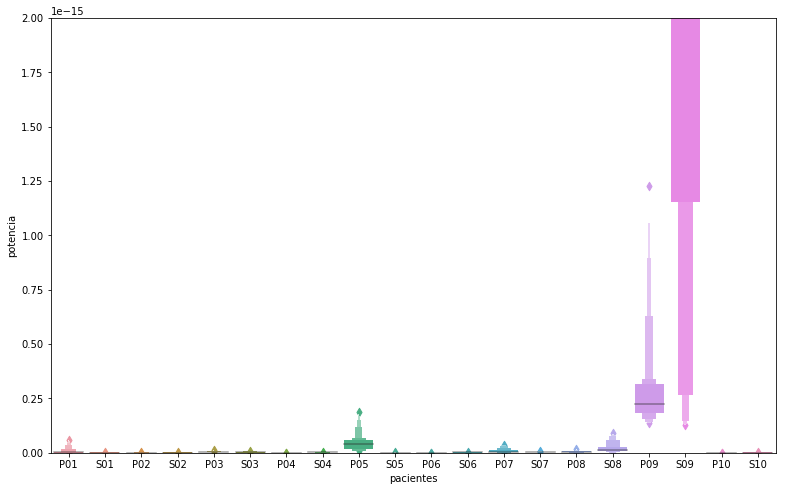

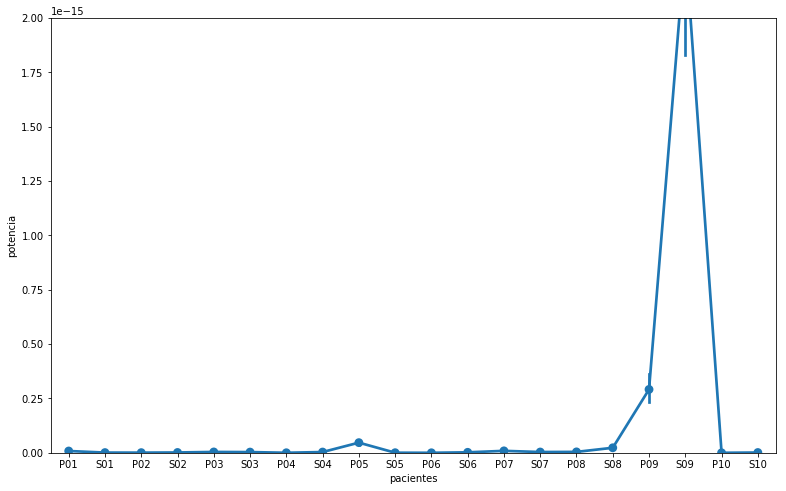

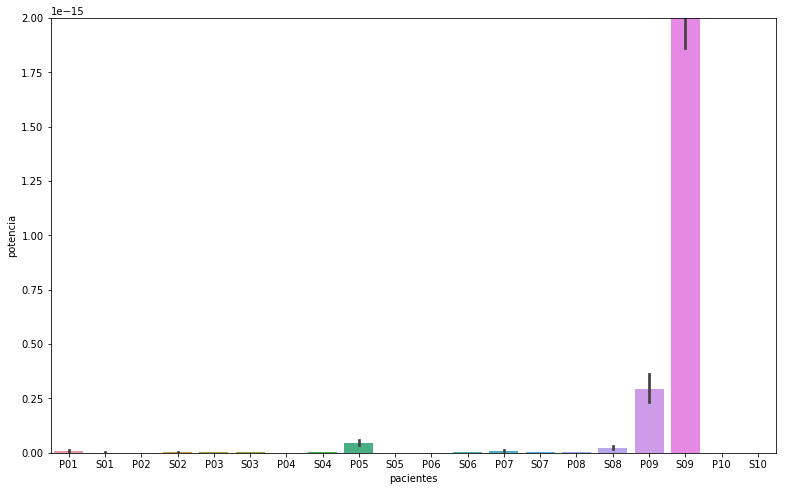

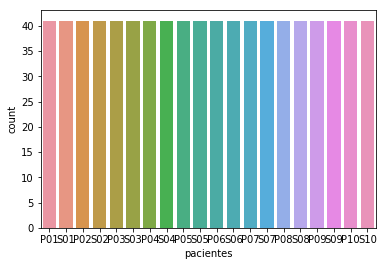

In [111]:
import seaborn as sb
import matplotlib.pyplot as plt
valores = []

for paciente in pacientes:
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    inicio = 8
    fin = 13
    mx = 0
    for j in range(len(pot)):
        if freq[j] >= inicio and freq[j] < fin:
            valores.append((paciente[:3], pot[j]))
            mx = max(mx, pot[j])
            
mx = 2*10**(-15)
    
valoresdf = pd.DataFrame(valores, columns = ["pacientes", "potencia"])

plt.figure(figsize=(13,8))
sb.stripplot(x = "pacientes", y = "potencia", data = valoresdf, jitter = True)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.swarmplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.boxplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.lvplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.pointplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.barplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

sb.countplot(x = "pacientes", data = valoresdf)
plt.show()

2.1.c violin



In [ ]:
import numpy as np

bandas = [0, 4, 8, 13, 30, 45]
bandaspaciente = []
valores = [[] for i in range(len(bandas))]

for paciente in pacientes[:9]:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    bandaspaciente.append([])
    
    for i in range(len(bandas) -1):
        inicio = bandas[i] 
        fin = bandas[i+1]
        for j in range(len(pot)):
            if freq[j] >= inicio and freq[j] < fin:
                valores[i].append((paciente[:3], pot[j]))

for i in range(len(bandas) -1):
    valoresdf = pd.DataFrame(valores[i], columns = ["pacientes", "potencia"])

    plt.figure(figsize=(13,8))
    sb.violinplot(x = "pacientes", y = "potencia", data = valoresdf)
    plt.ylim(0, max([v[1] for v in valores[i]]))
    plt.show()
    

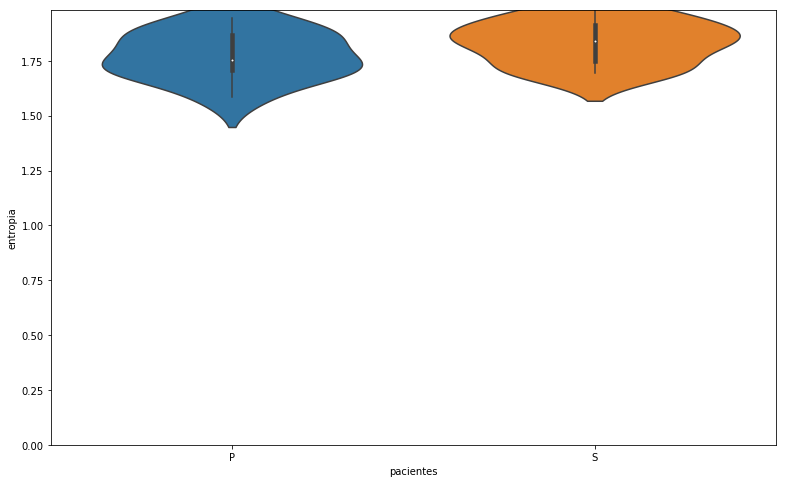

Ttest_relResult(statistic=-1.158436017804322, pvalue=0.27650052620436455)


In [110]:
import numpy as np
import scipy
#import scipy.stats.ttest_rel
import math

bandas = [0, 4, 8, 13, 30, 45]
valores = [[] for i in range(len(bandas))]
entropies = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    # Deshardcodear
    hist = np.histogram(avg2, bins = "scott")
    suma = float(sum(hist[0]))
    aux = [i/suma * math.log(i/suma) for i in hist[0] if i!=0]
    entropy = -sum(aux)
    entropies.append((paciente[0], entropy))
        

valoresdf = pd.DataFrame(entropies, columns = ["pacientes", "entropia"])
plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "entropia", data = valoresdf)
plt.ylim(0, max([v[1] for v in entropies]))
plt.show()

### Test Estadistico ###

##[|pacientes: P/S, entropia: num|]
patients_p = valoresdf["entropia"][::2]
patients_s = valoresdf["entropia"][1::2]
    
testResult = scipy.stats.ttest_rel(patients_p, patients_s)
print testResult

    
    


In [108]:
import numpy as np
import math

bandas = [0, 4, 8, 13, 30, 45]
valores = [[] for i in range(len(bandas))]
entropies = []

for paciente in pacientes[:3]:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 0)
    print len(avg1), len(avg1[0])
    # Deshardcodear
    for electrode in avg1:
        bins = 25
        hist = np.histogram(avg2, bins)
    suma = float(sum(hist[0]))
    aux = [i/suma * math.log(i/suma) for i in hist[0] if i!=0]
    entropy = -sum(aux)
    entropies.append((paciente[0], entropy))
        

valoresdf = pd.DataFrame(entropies, columns = ["pacientes", "entropia"])
plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "entropia", data = valoresdf)
plt.ylim(0, max([v[1] for v in entropies]))
plt.show()

KeyboardInterrupt: 